<a href="https://colab.research.google.com/github/alexc6h6/Image-Classification-CNN/blob/master/Images_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images Augmentation & Image Classification

This dataset contains images of hand gestures from the Rock-Paper-Scissors game. There are 2,083 images for training, 105 images for validation.

Image augmentation are applied to generate more training images by rotation, change the width or height, shear, zoom and flip the images. Using augmentation images in CNN model can increase the accuracy in training set and validaton set.


In [0]:
#!pip install --upgrade tensorflow

In [5]:
from google.colab import drive, files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers

print(tf.__version__)

2.2.0


In [6]:
#the dataset has been uploaded in google drive, mounted the linkage to prepare for loading dataset

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#setup the path of training image dataset folders

train_folder_path = '/content/drive/My Drive/rockpaperscissors/train'

train_rock_path = os.path.join(train_folder_path, 'rock')
train_paper_path = os.path.join(train_folder_path, 'paper')
train_scissors_path = os.path.join(train_folder_path, 'scissors')

#caculated the items for each class

print(len(os.listdir(train_rock_path)))
print(len(os.listdir(train_paper_path)))
print(len(os.listdir(train_scissors_path)))

691
677
715


In [13]:
#setup the path of testing image dataset folders
test_folder_path = '/content/drive/My Drive/rockpaperscissors/test'

test_rock_path = os.path.join(test_folder_path, 'rock')
test_paper_path = os.path.join(test_folder_path, 'paper')
test_scissors_path = os.path.join(test_folder_path, 'scissors')

print(len(os.listdir(test_rock_path)))
print(len(os.listdir(test_paper_path)))
print(len(os.listdir(test_scissors_path)))

35
35
35


In [0]:
#datagen = ImageDataGenerator(
#        featurewise_center=False,  # set input mean to 0 over the dataset
#        samplewise_center=False,  # set each sample mean to 0
#        featurewise_std_normalization=False,  # divide inputs by std of the dataset
#        samplewise_std_normalization=False,  # divide each input by its std
#        zca_whitening=False,  # apply ZCA whitening
#        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
#        zoom_range = 0.1, # Randomly zoom image 
#        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#        horizontal_flip=False,  # randomly flip images
#        vertical_flip=False)  # randomly flip images

#datagen.fit(train_x)

In [0]:
#flow the images dataset and augment the training dataset

train_datagen = ImageDataGenerator(rescale = 1/255, 
                                   rotation_range = 180, 
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1, 
                                   zoom_range = 0.1, 
                                   shear_range = 0.1, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)


In [21]:
train_generator = train_datagen.flow_from_directory(train_folder_path, 
                                                    target_size = (75, 50),
                                                    batch_size = 128,
                                                    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_folder_path,
                                                  target_size = (75, 50),
                                                  batch_size = 128,
                                                  class_mode = 'categorical')

Found 2083 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [22]:
#generate the CNN model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation = 'relu',
                                                           padding = 'same', strides = 1, input_shape = (75, 50, 3)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu',
                                                           padding = 'same', strides = 1),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(256, (3,3), activation = 'relu',
                                                           padding = 'same', strides = 1),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.25),
                                    
                                    tf.keras.layers.Dense(units = 256),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Activation('relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(units = 3, activation = 'softmax')])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 75, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 25, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 12, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 18, 12, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 12, 256)      

In [0]:
#reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              patience = 5,
                              verbose = 1,
                              min_lr = 0.000001,
                              factor = 0.033)

In [24]:
#training model

epochs = 50

history = model.fit_generator(train_generator,
                              epochs = epochs,
                              verbose = 1,
                              callbacks = [reduce_lr],
                              validation_data = test_generator)

Epoch 1/50
17/17 [==============================] - 11s 664ms/step - loss: 1.2576 - acc: 0.4450 - val_loss: 1.0344 - val_acc: 0.4667 - lr: 0.0010
Epoch 2/50
17/17 [==============================] - 11s 648ms/step - loss: 1.0570 - acc: 0.5396 - val_loss: 0.9605 - val_acc: 0.5333 - lr: 0.0010
Epoch 3/50
17/17 [==============================] - 11s 621ms/step - loss: 0.8436 - acc: 0.6227 - val_loss: 0.9030 - val_acc: 0.6286 - lr: 0.0010
Epoch 4/50
17/17 [==============================] - 11s 619ms/step - loss: 0.6488 - acc: 0.7384 - val_loss: 0.8828 - val_acc: 0.5905 - lr: 0.0010
Epoch 5/50
17/17 [==============================] - 10s 616ms/step - loss: 0.4752 - acc: 0.8123 - val_loss: 0.7813 - val_acc: 0.6095 - lr: 0.0010
Epoch 6/50
17/17 [==============================] - 11s 618ms/step - loss: 0.3752 - acc: 0.8656 - val_loss: 0.8862 - val_acc: 0.3810 - lr: 0.0010
Epoch 7/50
17/17 [==============================] - 11s 624ms/step - loss: 0.3291 - acc: 0.8901 - val_loss: 0.6662 - val_acc

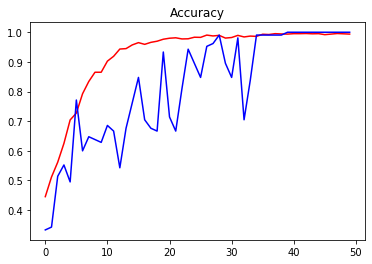

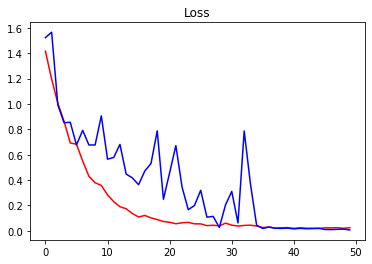

0.993759
1.0


In [0]:
#plot training history

import matplotlib.pyplot as plt

plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('Loss')
plt.show()

print('Training Accuracy' + str(history.history['acc'][-1]))
print('Validation Accuracy' + str(history.history['val_acc'][-1]))